In [17]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 0 Business Context and Approach (Arabella)

# 1 Exploratory Data Analysis (Kevin)

## 1.1 Summary Statistics

In [2]:
# Path to folder containing data file
path = "/Users/fynn/Desktop/ML/KKBOX-Data/"

# Import raw data
kkbox_df = pd.read_csv(path + "kkbox_churn.csv")

kkbox_df.describe()

,is_churn,city,bd,registered_via,registration_init_time,count_userlogs_last_month,num_25_last_month,num_50_last_month,num_75_last_month,num_985_last_month,...,num_985_last_week,num_100_last_week,num_unq_last_week,total_secs_last_week,avg_payment_plan_days,avg_plan_list_price,avg_actual_amount_paid,last_payment_method_id,last_is_auto_renew,memberdays_left
count,970960.000000,860967.000000,860967.000000,860967.000000,8.609670e+05,754551.000000,754551.000000,754551.000000,754551.000000,754551.000000,...,667498.000000,667498.000000,667498.000000,6.674980e+05,933578.000000,933578.000000,933578.000000,933578.000000,933578.000000,933578.000000
mean,0.089942,5.937295,13.583854,6.892744,2.013265e+07,17.935095,108.773786,26.257260,16.545723,18.713420,...,5.459781,152.540436,147.539888,3.993535e+04,33.668171,144.078964,143.761684,38.899789,0.912113,332.568452
std,0.286099,6.441203,20.064040,1.937794,3.011174e+04,9.676949,179.003032,38.707599,22.399375,41.691069,...,12.573304,210.558298,167.310346,5.134569e+04,31.539039,133.629682,133.723976,3.785421,0.283130,2003.127209
min,0.000000,1.000000,-3152.000000,3.000000,2.004033e+07,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,3.400000e-02,0.000000,0.000000,0.000000,3.000000,0.000000,-74.000000
25%,0.000000,1.000000,0.000000,7.000000,2.012021e+07,9.000000,19.000000,5.000000,3.000000,3.000000,...,1.000000,32.000000,38.000000,9.159578e+03,30.000000,99.000000,99.000000,38.000000,1.000000,99.000000
50%,0.000000,1.000000,0.000000,7.000000,2.014060e+07,19.000000,55.000000,14.000000,10.000000,10.000000,...,3.000000,87.000000,96.000000,2.386404e+04,30.000000,149.000000,149.000000,41.000000,1.000000,100.000000
75%,0.000000,13.000000,27.000000,9.000000,2.016012e+07,27.000000,133.000000,33.000000,22.000000,23.000000,...,7.000000,188.000000,196.000000,5.018832e+04,30.000000,149.000000,149.000000,41.000000,1.000000,100.000000
max,1.000000,22.000000,2016.000000,13.000000,2.017042e+07,31.000000,46820.000000,3163.000000,1310.000000,15164.000000,...,4048.000000,16884.000000,4292.000000,4.196711e+06,450.000000,2000.000000,2000.000000,41.000000,1.000000,79281.000000


## 1.2 Correlations to Target Variable

## 1.3 Distribution & Correlation of Most Relevant Variables

Like here second example https://seaborn.pydata.org/generated/seaborn.pairplot.html

## 1.4 Distribution of Target Variable

Simple bar plot --> Show imbalance of dataset and need for over/ undersampling

# 2 Data Preparation (Fynn)

## 2.1 Handle Missing Values

In [3]:
# Get counts of missing values
print(kkbox_df.isna().sum())

# Get number of rows if we would remove all NaN
print("\nNumber of rows when removing all NaN:", len(kkbox_df.dropna().index))

# Get number of rows if we would remove all NaN after dropping gender
print("\nNumber of rows when removing all NaN without gender:",
      len(kkbox_df.drop("gender", axis=1).dropna().index))

msno                              0
is_churn                          0
city                         109993
bd                           109993
gender                       582055
registered_via               109993
registration_init_time       109993
count_userlogs_last_month    216409
num_25_last_month            216409
num_50_last_month            216409
num_75_last_month            216409
num_985_last_month           216409
num_100_last_month           216409
num_unq_last_month           216409
total_secs_last_month        216409
num_25_last_week             303462
num_50_last_week             303462
num_75_last_week             303462
num_985_last_week            303462
num_100_last_week            303462
num_unq_last_week            303462
total_secs_last_week         303462
avg_payment_plan_days         37382
avg_plan_list_price           37382
avg_actual_amount_paid        37382
last_payment_method_id        37382
last_is_auto_renew            37382
memberdays_left             

In [4]:
# Drop gender to preserve 336.447 rows
kkbox_df_clean = kkbox_df.drop("gender", axis=1)

# Fill missing values indicating no customer activity with zeros to preserve 168.933 rows
month_week_cols = kkbox_df_clean.filter(regex="month|week").columns
kkbox_df_clean[month_week_cols] = kkbox_df_clean[month_week_cols].fillna(0)

# Drop rows with missing values
kkbox_df_clean = kkbox_df_clean.dropna()

print("Size of NA cleaned dataset:", len(kkbox_df_clean.index))

Size of NA cleaned dataset: 825368


## 2.2 Handle Categorical Variables

In [5]:
# HANDLE FEATURE TYPES ---------------------------------------------------------

# Round all features
kkbox_df_clean.iloc[:,2:] = round(kkbox_df_clean.iloc[:,2:]).astype("int64")

# HANDLE CATEGORICAL FEATURES --------------------------------------------------

# Set correct types of categorical variables
cat_feats = ["city", "registered_via", "last_payment_method_id"]
kkbox_df_clean[cat_feats] = kkbox_df_clean[cat_feats].astype("category")

# One-hot encoding
encoder = preprocessing.OneHotEncoder(sparse=False)
cat_feats_onehot = encoder.fit_transform(kkbox_df_clean[cat_feats])
df_cat_feats_onehot = pd.DataFrame(cat_feats_onehot).astype("int64")
df_cat_feats_onehot.columns = encoder.get_feature_names(cat_feats)

# Append one-hot encoded features to data frame
kkbox_df_clean = pd.concat([kkbox_df_clean.reset_index(), df_cat_feats_onehot], axis=1)

# Remove not needed columns
kkbox_df_clean = kkbox_df_clean.drop(["index", "msno"] + cat_feats, axis=1)
kkbox_df_clean

,is_churn,bd,registration_init_time,count_userlogs_last_month,num_25_last_month,num_50_last_month,num_75_last_month,num_985_last_month,num_100_last_month,num_unq_last_month,...,last_payment_method_id_32,last_payment_method_id_33,last_payment_method_id_34,last_payment_method_id_35,last_payment_method_id_36,last_payment_method_id_37,last_payment_method_id_38,last_payment_method_id_39,last_payment_method_id_40,last_payment_method_id_41
0,1,20,20131223,6,0,4,2,0,26,30,...,0,0,0,0,1,0,0,0,0,0
1,1,18,20131227,20,239,57,32,22,205,432,...,0,0,0,0,0,0,0,0,0,0
2,1,0,20140109,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35,20140125,15,9,7,4,4,962,548,...,0,0,0,0,0,0,0,0,0,1
4,1,0,20140126,4,6,1,1,4,37,48,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825363,0,25,20110830,24,117,26,30,25,461,429,...,0,0,0,0,0,0,0,0,0,1
825364,0,28,20110831,24,48,7,4,9,318,291,...,0,0,0,0,0,0,0,0,1,0
825365,0,0,20110903,5,43,8,8,7,22,54,...,0,0,0,0,0,0,0,0,0,1
825366,0,0,20110905,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 2.3 Min-Max Normalization

Some models e.g. logistic regression or neural networks require features to be on a similar scale and be normally distributed. Scaled data may have advantages for modelling but can be complicated in interpreting the results for a business context. Min-max normalized customer age data for example is no longer related to the actual customer age and has, e.g. as a decision tree split attribute, no direct interpretable value anymore.

In [6]:
# Min-max scaling
mm_scaler = preprocessing.MinMaxScaler()
kkbox_mat_mmnorm = mm_scaler.fit_transform(kkbox_df_clean)

# Put back into pandas df
kkbox_df_mmnorm = pd.DataFrame(kkbox_mat_mmnorm, columns=kkbox_df_clean.columns)

kkbox_df_mmnorm

,is_churn,bd,registration_init_time,count_userlogs_last_month,num_25_last_month,num_50_last_month,num_75_last_month,num_985_last_month,num_100_last_month,num_unq_last_month,...,last_payment_method_id_32,last_payment_method_id_33,last_payment_method_id_34,last_payment_method_id_35,last_payment_method_id_36,last_payment_method_id_37,last_payment_method_id_38,last_payment_method_id_39,last_payment_method_id_40,last_payment_method_id_41
0,1.0,0.613777,0.698681,0.193548,0.000000,0.001265,0.001527,0.000000,0.000451,0.001282,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.613390,0.698712,0.645161,0.005105,0.018021,0.024427,0.001451,0.003554,0.018459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.609907,0.766983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.616680,0.767106,0.483871,0.000192,0.002213,0.003053,0.000264,0.016680,0.023416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.609907,0.767114,0.129032,0.000128,0.000316,0.000763,0.000264,0.000642,0.002051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825363,0.0,0.614745,0.541930,0.774194,0.002499,0.008220,0.022901,0.001649,0.007993,0.018331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
825364,0.0,0.615325,0.541938,0.774194,0.001025,0.002213,0.003053,0.000594,0.005514,0.012434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
825365,0.0,0.609907,0.542491,0.161290,0.000918,0.002529,0.006107,0.000462,0.000381,0.002307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
825366,0.0,0.609907,0.542506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 2.4 Standard Scaling

The standard scaler scales every variable's mean to 0 and standard deviation to 1.

In [7]:
# Standard scaling
st_scaler = preprocessing.StandardScaler()
kkbox_mat_stscale = st_scaler.fit_transform(kkbox_df_clean)

# Put back into pandas df and keep original binary target variable
kkbox_df_stscale = pd.DataFrame(kkbox_mat_stscale, columns=kkbox_df_clean.columns)
kkbox_df_stscale["is_churn"] = kkbox_df_clean["is_churn"]

kkbox_df_stscale

,is_churn,bd,registration_init_time,count_userlogs_last_month,num_25_last_month,num_50_last_month,num_75_last_month,num_985_last_month,num_100_last_month,num_unq_last_month,...,last_payment_method_id_32,last_payment_method_id_33,last_payment_method_id_34,last_payment_method_id_35,last_payment_method_id_36,last_payment_method_id_37,last_payment_method_id_38,last_payment_method_id_39,last_payment_method_id_40,last_payment_method_id_41
0,1,0.325039,-0.040935,-0.924594,-0.560476,-0.516732,-0.583841,-0.416305,-0.608982,-0.728398,...,-0.094353,-0.128128,-0.179739,-0.019663,3.347560,-0.215009,-0.231211,-0.290060,-0.311814,-1.079313
1,1,0.226053,-0.040803,0.370656,0.819897,0.894233,0.788135,0.131788,-0.368697,-0.043624,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,-1.079313
2,1,-0.664820,0.253308,-1.479701,-0.560476,-0.623220,-0.675306,-0.416305,-0.643884,-0.779501,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,0.926515
3,1,1.067434,0.253837,-0.091933,-0.508495,-0.436866,-0.492376,-0.316652,0.647485,0.153973,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,0.926515
4,1,-0.664820,0.253871,-1.109630,-0.525822,-0.596598,-0.629574,-0.316652,-0.594216,-0.697736,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,3.207036,-1.079313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825363,0,0.572504,-0.716210,0.740727,0.115272,0.068952,0.696670,0.206528,-0.025047,-0.048734,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,0.926515
825364,0,0.720983,-0.716177,0.740727,-0.283246,-0.436866,-0.492376,-0.192085,-0.217008,-0.283806,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,3.207036,-1.079313
825365,0,-0.664820,-0.713793,-1.017112,-0.312124,-0.410244,-0.309446,-0.241912,-0.614352,-0.687516,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,0.926515
825366,0,-0.664820,-0.713727,-1.479701,-0.560476,-0.623220,-0.675306,-0.416305,-0.643884,-0.779501,...,-0.094353,-0.128128,-0.179739,-0.019663,-0.298725,-0.215009,-0.231211,-0.290060,-0.311814,0.926515


## 2.5 Dimensionality Reduction: PCA

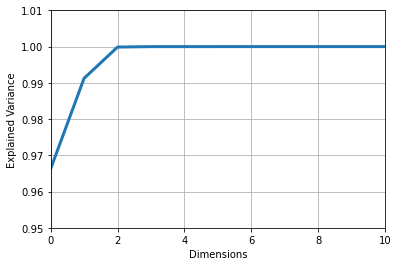

In [13]:
# Find the best number of features to preserve the original data variance
pca = PCA()
pca.fit(kkbox_df_clean.drop("is_churn", axis=1))
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot elbow curve
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 10, 0.95, 1.01])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

Already at a reduction to two dimensions, all of the variance of the the original data is preserved. Therefore, we reduce to two dimensions:

In [16]:
pca = PCA(n_components=2)
kkbox_mat_pca = pca.fit_transform(kkbox_df_clean.drop("is_churn", axis=1))

# Put into data frame and add target
kkbox_df_pca = pd.DataFrame(kkbox_mat_pca, columns=["pca_comp_1", "pca_comp_2"])
kkbox_df_pca["is_churn"] = kkbox_df_clean["is_churn"]

kkbox_df_pca

,pca_comp_1,pca_comp_2,is_churn
0,-122318.696205,-2570.525262,1
1,-59806.351056,-1882.514663,1
2,-129191.361535,6196.598247,1
3,129477.670623,9029.518709,1
4,-119386.291707,6366.177210,1
...,...,...,...
825363,1522.511019,-21618.614370,0
825364,-52884.282385,-22190.552276,0
825365,-119074.871134,-22861.961166,0
825366,-128872.744066,-22963.243031,0


## 2.6 Dimensionality Reduction: T-SNE

In [18]:
tsne = TSNE(n_components=2)
kkbox_mat_tsne = pca.fit_transform(kkbox_df_clean.drop("is_churn", axis=1))

# Put into data frame and add target
kkbox_df_tsne = pd.DataFrame(kkbox_mat_tsne, columns=["tsne_comp_1", "tsne_comp_2"])
kkbox_df_tsne["is_churn"] = kkbox_df_clean["is_churn"]

kkbox_df_tsne

,tsne_comp_1,tsne_comp_2,is_churn
0,-122318.696205,-2570.525262,1
1,-59806.351056,-1882.514663,1
2,-129191.361535,6196.598247,1
3,129477.670623,9029.518709,1
4,-119386.291707,6366.177210,1
...,...,...,...
825363,1522.511019,-21618.614370,0
825364,-52884.282385,-22190.552276,0
825365,-119074.871134,-22861.961166,0
825366,-128872.744066,-22963.243031,0


**Preprocessing Fazit:**
We have conducted several techniques of data preprocessing to firstly clean our data and assure that we can train models on them without problems in the data frame *kkbox_df_clean* (no missing values & one-hot encoded categorical variables). Furthermore, we also created several versions of our base dataframe *kkbox_df_clean* which we can try out in the modelling stage if they lead to better models: we applied two types of normalization and scaling (*kkbox_df_mmnorm* & *kkbox_df_stscale*) and two types of dimensionality reduction (*kkbox_df_pca* & *kkbox_df_tsne*).

# 3 Modelling (Farouq)

# 4 Final Pipeline (Vaclav)

# 5 Business Implications (Arabella)